# HOG 알고리즘 (보행자 검출)
* 2005년 다랄(N. Dalal)과 트릭스(B. Triggs)가 발표한 알고리즘.
* HOG(Histograms of Oriented Gradients) - 방향 그래디언트 히스토그램을 뜻함.
* 머신러닝의 일종인 서포트 벡터 머신(SVM : Support Vector Machine)알고리즘을 이용.

## Gradient Vectors (기울기 벡터)
하나의 픽셀 기준으로 주변 픽셀에 대한 기울기를 나타내는 벡터. 일종의 에지 검출.  
<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FJfx9n%2FbtqIglONHyC%2FtOHcKJhDVjftQ0DXCId0b0%2Fimg.png" height="20%" width="20%">  
x축 밝기 변화량: 38, y축 밝기 변화량: 38  
<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FwKDuI%2FbtqH7aAPvEe%2F6LAQIx8oLYLsXhY2QkA2D0%2Fimg.png" height="20%" width="20%">   
변화량을 이용해 크기와 각도를 구함.  
<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbnzkC9%2FbtqIbAZ3JRB%2FpcdIgyWZxTZbGLA3kqI0Gk%2Fimg.png" height="20%" width="20%">  
최종적으로는 픽셀의 밝기 변화 백터를 구할 수 있음.

## 기울기 벡터 동작 과정
1. 기울기 벡터을 구함.
2. 계산된 그라디언트 방향 성분을 0~180으로 하고, 입력된 영상 크기를 일정한 단위로 분할(셀). 각 셀로부터 그라디언트 방향 성분에 대한 히스토그램을 구하고, 각 방향 성분을 20단위로 구분, 분류. 이때 머신러닝 알고리즘인 SVM 사용.
3. 인접한 셀을 묶어 보행자 검출

In [4]:
import cv2
from matplotlib import pyplot as plt

## HOGDescriptor
cv2.HOGDescriptor(winSize, blockSize, blockStride, cellSize, nbins): HOG 디스크립터 추출기 생성
* winSize: 윈도 크기, HOG 추출 영역
* blockSize: 블록 크기, 정규화 영역
* blockStride: 정규화 블록 겹침 크기
* cellSize: 셀 크기, 히스토그램 계산 영역
* nbins: 히스토그램 계급 수
* descriptor: HOG 특징 디스크립터 추출기

In [13]:
# 객체 생성 및 설정. 미리 훈련된 특징 벡터 가져오기
hogdef = cv2.HOGDescriptor()
hogdef.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

In [19]:
img = cv2.imread('./img/hog_test.jpg')
detect, _ = hogdef.detectMultiScale(img)

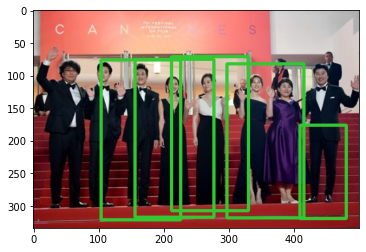

In [21]:
for (x,y,w,h) in detect:
    cv2.rectangle(img, (x,y), (x+w, y+h), (50, 200, 50), 3)
img_result = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_result)